In [2]:
#To-do: to fix the order of position so that signal can be registered!! 

import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime

import requests
from termcolor import colored as cl 
plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)



In [5]:
# data import 
df = pd.read_excel('Time Series Data.xlsx', index_col = 'Day')
df.head(10)


,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,Series 11,Series 12,Series 13,Series 14,Series 15,Series 16,Series 17,Series 18,Series 19,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
Day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.172920,100.589993,103.823464,98.644063,99.750482,106.614321,101.767999,100.732626,99.952576,100.227093,98.790108,100.032421,96.316754,101.460335,98.573111,100.032584,99.004063,100.390444,100.318979,101.568951,99.730607,99.673906,99.409461,99.113705,100.012563,100.311565,99.887188,96.556886,97.922078
2,98.579911,98.767737,107.058757,97.936942,99.220660,110.602917,100.681776,100.383846,99.617067,100.246064,98.754979,99.418521,99.700262,102.108065,98.256322,99.558198,98.782991,101.258255,102.048828,106.193229,101.541426,99.977798,99.577298,99.783831,99.682467,100.366287,99.902872,95.608782,100.000000
3,98.397809,97.087379,107.352843,100.000000,99.251805,113.424191,102.651998,101.569981,98.659381,101.230321,98.509591,98.384407,97.980366,100.108347,97.886884,99.018405,98.838321,100.940089,101.410870,106.936416,100.938414,99.278429,99.055138,100.875486,99.637414,100.767880,100.216365,95.109780,100.000000
4,99.051233,99.716206,105.587978,99.703996,99.407530,113.715275,100.710685,101.081407,99.760755,101.040888,96.686487,99.063150,99.663613,100.325042,98.679303,98.887350,98.340352,100.535001,101.521286,107.018993,101.448655,99.979185,99.602163,100.162127,100.379047,101.058262,100.323414,90.469062,99.480519
5,98.177450,97.318895,106.764672,99.056674,97.786202,117.800899,99.121810,98.221499,100.335509,101.097803,98.649591,97.802929,99.532723,98.918881,99.471721,98.494664,99.962949,101.663108,101.239112,95.293146,102.740313,100.693818,100.167837,99.535236,100.172412,101.234786,100.756144,87.574850,100.000000
6,97.061884,95.108290,103.529379,97.288125,96.102227,115.466257,96.960985,97.593600,98.707513,101.059860,99.719483,97.156608,97.924084,95.564820,99.154932,99.623606,100.921834,101.156924,99.116673,92.568126,100.685078,100.513425,100.491080,98.341980,98.868923,100.285086,100.409110,91.067864,97.142857
7,98.429944,96.422704,102.941207,98.820469,97.567830,113.618247,97.683150,98.116771,100.383641,101.684506,99.982435,98.061457,100.897906,96.862634,101.478646,100.654317,101.438328,100.752072,97.718071,92.568126,101.544102,100.679942,101.199726,98.767834,99.977041,101.120045,100.914686,89.071856,98.701299
8,97.860684,95.108290,103.235293,98.231451,96.725842,114.397456,97.371171,98.709605,102.873767,101.930570,100.157565,100.032421,95.344241,95.348125,102.377255,100.752548,99.962949,100.766480,97.399092,95.540875,101.900913,100.596684,101.541617,98.573281,100.360420,101.365414,101.196055,87.974052,97.662338


In [11]:
# Plot test-statistics, p-score, and cointegrated pair
# Save the pairs that has a p-score lower than 0.02

def find_cointegrated_pairs(data):
    n = len(data.axes[1])
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            tscore = result[0]
            pvalue = result[1]
            score_matrix[i, j] = tscore
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs



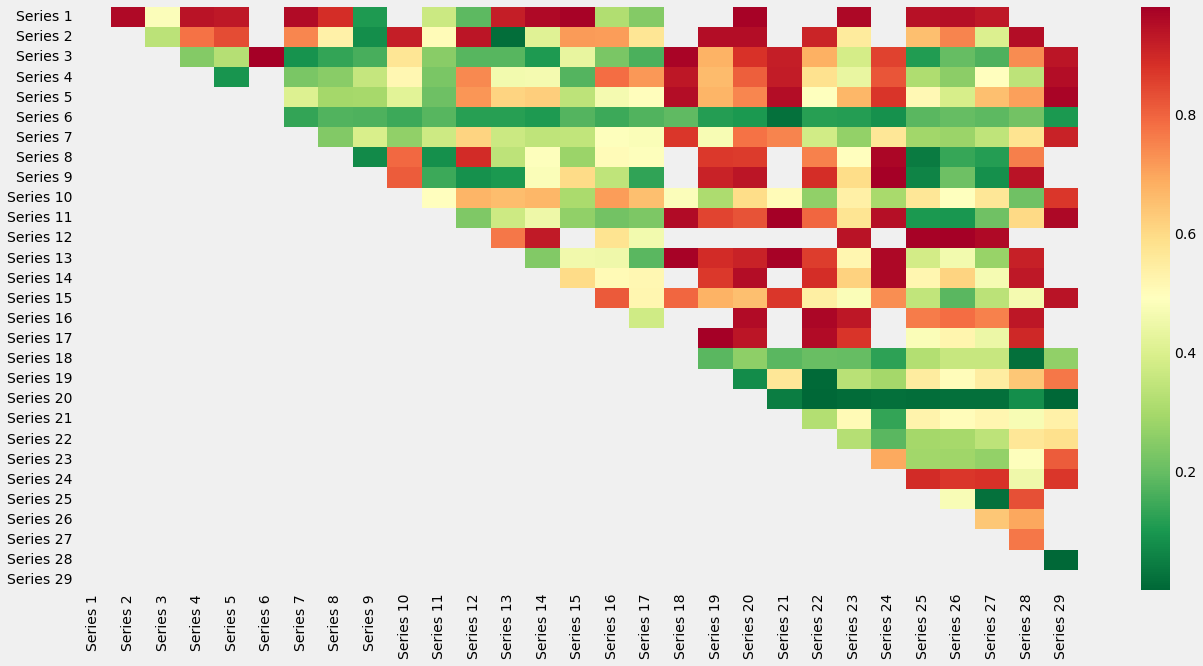

[('Series 2', 'Series 13'), ('Series 18', 'Series 28'), ('Series 19', 'Series 22'), ('Series 20', 'Series 22'), ('Series 20', 'Series 23'), ('Series 20', 'Series 24'), ('Series 20', 'Series 25'), ('Series 20', 'Series 26'), ('Series 20', 'Series 27'), ('Series 20', 'Series 29'), ('Series 28', 'Series 29')]


In [12]:
# Plot a heatmap of the p-score (the lower the better)

name = [] 
for column in df:
    name.append(column)
    
tscores, pvalues, pairs = find_cointegrated_pairs(df)
m = [0,0.2,0.4,0.6,0.8,1]
sns.heatmap(pvalues, xticklabels=name, 
                yticklabels=name, cmap='RdYlGn_r', 
                mask = (pvalues >= 0.98))
plt.show()
print(pairs)

In [13]:
# Trade strategy: normalise the ratio and trade based on z-score 
# Note: profit is compared against the avereaged return from buy-and-hold of the two strategies

def trade(S1, S2, shortMA, longMA, STD):

    ratios = S1/ S2 
    ratios_mavgshort = ratios.rolling(window=shortMA, center=False).mean()
    ratios_mavglong = ratios.rolling(window=longMA, center=False).mean()
    std_hist = ratios.rolling(window=STD, center=False).std()
    zscore = (ratios_mavgshort - ratios_mavglong)/std_hist

    # Start with no money and no positions
    money = 0
    money_list = []
    signalS1 = []
    signalS2 = []
    positionS1 = []
    positionS2 = []
    
    for i in range(len(S1)):    
        positionS1.append(0)
        positionS2.append(0)
    
    for i in range(len(ratios)):
        if i == (len(ratios)-1) : #and (signalS1[i] != 0 or signalS2[i] != 0)
            money += S1.iloc[i] * positionS1[i-1] + S2.iloc[i] * positionS2[i-1]
            money_list.append(money)
            signalS1.append(-positionS1[i-1])
            signalS2.append(-positionS2[i-1])
            positionS1[i] = positionS1[i-1] + signalS1[i]
            positionS2[i] = positionS2[i-1] + signalS2[i]

        elif zscore.iloc[i] > 1:
            money += S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
            money_list.append(money)
            signalS1.append(-1)
            signalS2.append(ratios.iloc[i])
            positionS1[i] = positionS1[i-1] + signalS1[i]
            positionS2[i] = positionS2[i-1] + signalS2[i]
            
        elif zscore.iloc[i] < -1:
            money -= S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
            money_list.append(money)
            signalS1.append(1)
            signalS2.append(-ratios.iloc[i])
            positionS1[i] = positionS1[i-1] + signalS1[i]
            positionS2[i] = positionS2[i-1] + signalS2[i]

        elif abs(zscore.iloc[i]) < 1:
            money += S1.iloc[i] * positionS1[i-1] + S2.iloc[i] * positionS2[i-1]
            money_list.append(money)
            signalS1.append(-1*positionS1[i-1])
            signalS2.append(-1*positionS2[i-1])
            positionS1[i] = positionS1[i-1] + signalS1[i]
            positionS2[i] = positionS2[i-1] + signalS2[i]

        else:
            money = money 
            money_list.append(money)
            signalS1.append(0)
            signalS2.append(0)
            positionS1[i] = positionS1[i-1] + signalS1[i]
            positionS2[i] = positionS2[i-1] + signalS2[i]

    return positionS1, positionS2, signalS1, signalS2, money, zscore, money_list, ratios
    



In [14]:
def profit(S1, S2, money):
    real_profit = money - ((S1.iloc[-1] - S1.iloc[0])+(S2.iloc[-1] - S2.iloc[0]))/2 
    buy_and_hold = ((S1.iloc[-1] - S1.iloc[0])+(S2.iloc[-1] - S2.iloc[0]))/2 
    return real_profit, buy_and_hold
    

In [16]:
# Backtest for the any duration: 

for key, value in pairs :
    print (key, value) 
    gain = trade(df[key].iloc[:], df[value].iloc[:], 5, 60, 60)
    profit_v = profit(df[key].iloc[:], df[value].iloc[:], gain[4])
    print(gain[4])

Series 2 Series 13
10404.929690085386
Series 18 Series 28
15244.572384654708
Series 19 Series 22
-188.27627543362414
Series 20 Series 22
1561.2517442841454
Series 20 Series 23
1761.5707970357173
Series 20 Series 24
2117.398706414608
Series 20 Series 25
1350.309944025058
Series 20 Series 26
1344.471758848545
Series 20 Series 27
1569.0637061314455
Series 20 Series 29
2372.516798396412
Series 28 Series 29
10101.995850515195


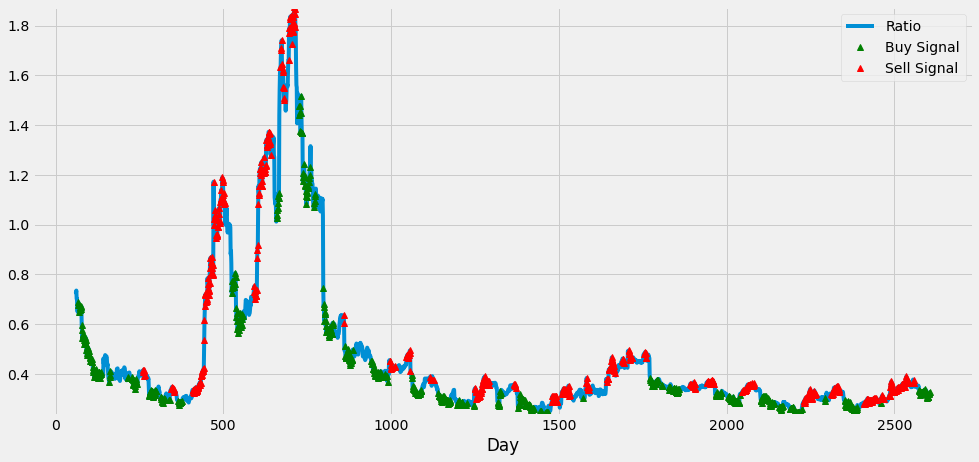

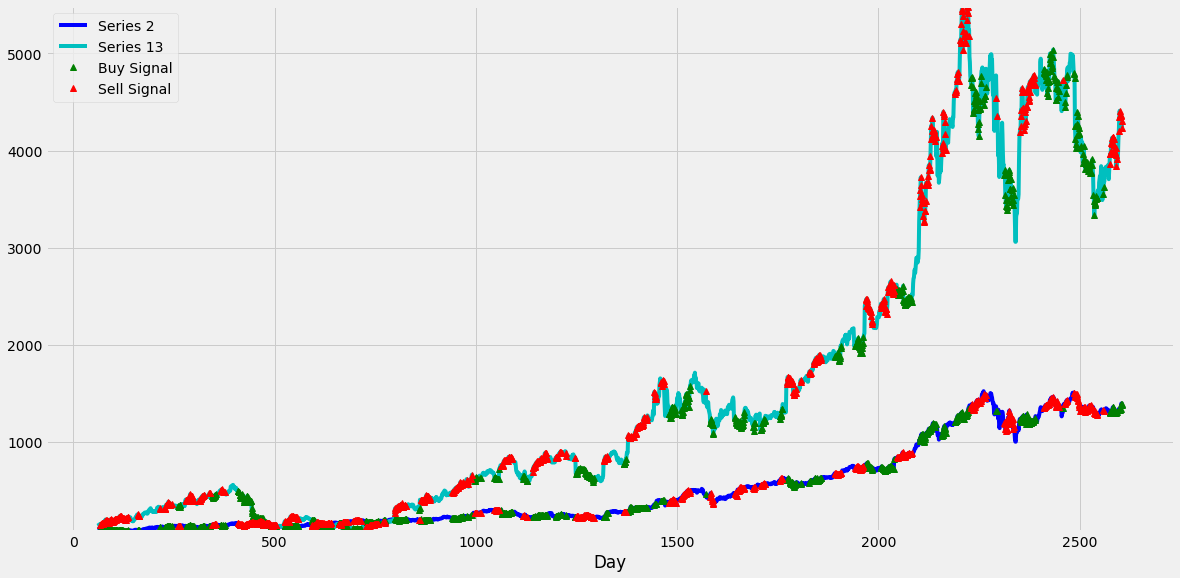

In [20]:
# Graph Plotting
pair1 = 'Series 2'
pair2 = 'Series 13'
ratios = df[pair1] / df[pair2]
test_period = ratios[:]


# Plot the ratios and buy and sell signals from z score
gain = trade(df[pair1].iloc[:], df[pair2].iloc[:], 5, 60, 60)
profit_v = profit(df[pair1].iloc[:], df[pair2].iloc[:], gain[4])



plt.figure(figsize=(15,7))
test_period[60:].plot()
buy = test_period.copy()
sell = test_period.copy()
buy[gain[5]>-1] = 0
sell[gain[5]<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = df['Series 2'].iloc[:]
S2 = df['Series 13'].iloc[:]
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()


# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['Series 2','Series 13', 'Buy Signal', 'Sell Signal'])
plt.show()

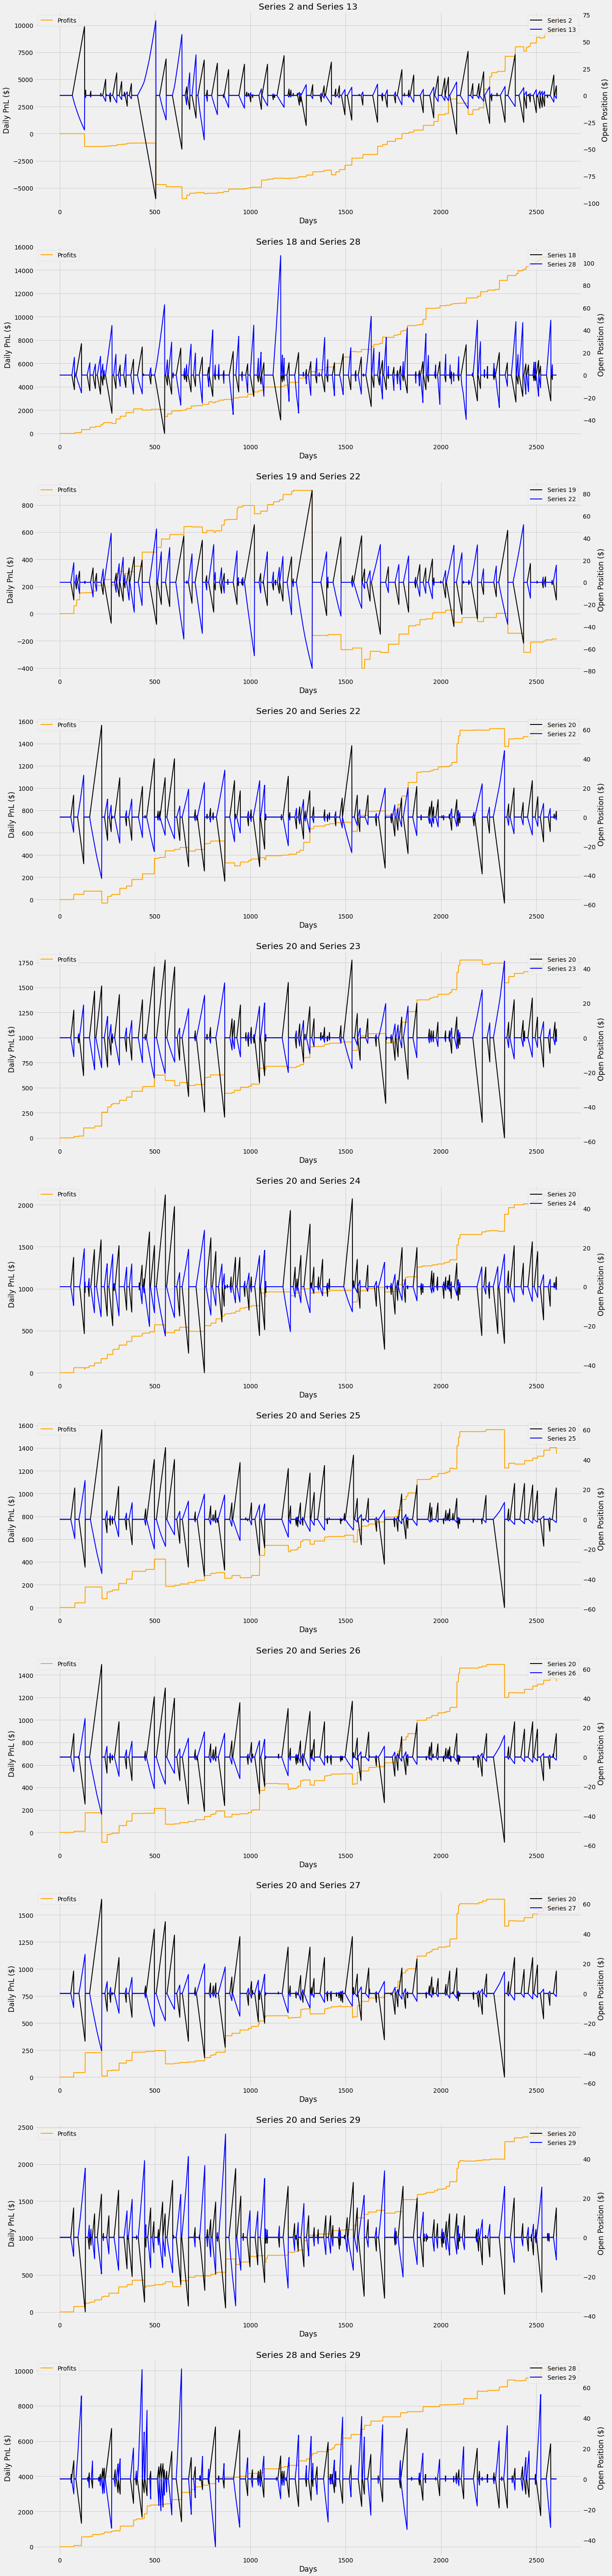

In [21]:
# Plotting

money_df = pd.DataFrame()
positionS1_df = pd.DataFrame()
positionS2_df = pd.DataFrame()
count = 0

# lower and upper bound of test range 
lb = 0
ub = len(df)

for key, value in pairs :
    count += 1
    gain = trade(df[key].iloc[:], df[value].iloc[:], 5, 60, 60)
    profit_v = profit(df[key].iloc[:], df[value].iloc[:], gain[4])
    money_df[key + ' (' + str(count) + ')'] = gain[6]
    positionS1_df[key + ' (' + str(count) + ')'] = gain[0]
    positionS2_df[key + ' (' + str(count) + ')'] = gain[1]
        


fig, axs = plt.subplots(nrows = len(pairs) , figsize=(20, 100))

for i in range(len(pairs)):
    axs[i].plot(df.index[lb:ub], money_df.iloc[lb:ub, i], linewidth=2, label='Profits', color='orange')
    ax2 = axs[i].twinx()
    ax2.plot(df.index[lb:ub], positionS1_df.iloc[lb:ub, i], linewidth=2, label=pairs[i][0], color='black')
    ax2.plot(df.index[lb:ub], positionS2_df.iloc[lb:ub, i], linewidth=2, label=pairs[i][1], color='blue')
    axs[i].set_title(pairs[i][0] + ' and ' + pairs[i][1])
    axs[i].set_xlabel('Days')
    ax2.set_ylabel('Open Position ($)')
    axs[i].set_ylabel('Daily PnL ($)')
    ax2.grid(False)
    axs[i].legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.show()

                      
#     return positionS1, positionS2, signalS1, signalS2, money, zscore, money_list, ratios





In [22]:
# Return for all pairs: 

profit_df = pd.DataFrame(columns = df.columns)
n = df.shape[1]

for i in range(n):
    profit = []
    for x in range(0,i+1):
        profit.insert(0, 0)
    for j in range(i+1, n):
        S1 = df[df.columns[i]]
        S2 = df[df.columns[j]]
        gain = trade(S1.iloc[:1763], S2.iloc[:1763], 5, 60, 60)
        profit.append(gain[4])
   
    profits_df = pd.DataFrame(columns = df.columns).transpose()
    profits_df[i] = profit
    profits_df = profits_df.transpose()
    profit_df = pd.concat([profit_df, profits_df])
    
profit_df


,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,Series 11,Series 12,Series 13,Series 14,Series 15,Series 16,Series 17,Series 18,Series 19,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
0,0.0,-4600.405336,-905.766516,227.570486,-2754.128948,-9754.30788,-1667.993512,1319.447476,2390.210993,-2117.165082,677.04959,-1300.949364,-19745.254788,-4969.915449,158.878657,443.46138,1527.313467,-40.209486,-7382.294503,-890.260095,421.848425,-2512.197349,-907.230767,-1321.827979,-435.061728,-732.173553,218.662058,18782.111455,-2099.999957
1,0.0,0.0,-9249.717592,-835.1105,-4667.870051,-1733.64678,-9208.342599,-274.388004,-1724.43816,-2314.715573,-4073.047069,-1639.282383,-459.843108,797.385846,-1119.01051,-315.447889,-1452.659957,-2782.539057,-2121.791533,5749.218119,194.927025,1513.3633,2630.526144,-790.96033,-8633.635935,-2361.447518,-1698.420248,24523.320368,-2565.576879
2,0.0,0.0,0.0,947.488533,1066.75733,899.173623,1270.235258,-159.308575,-1156.856885,418.924442,-546.931849,-3230.991517,988.090913,-4765.159454,1295.142152,310.441738,1086.697222,913.865225,-617.559323,4610.272022,-98.955027,1011.117483,208.927595,1037.157441,363.664533,756.943525,376.764901,11278.776303,1721.915289
3,0.0,0.0,0.0,0.0,1620.355102,1479.885754,1819.80475,3037.549866,-5092.475947,731.692097,1063.645158,385.505993,-2516.64177,-1790.603205,2381.617572,324.599911,1458.920604,2168.748886,-1414.871475,2892.472292,1881.333434,39.62915,334.62453,1029.597072,2296.780296,1396.031712,1912.871508,20355.017691,1039.190995
4,0.0,0.0,0.0,0.0,0.0,-4827.061702,713.886219,2526.429667,-2260.852915,-170.978916,1128.937378,-3712.966889,2220.349108,-4081.725237,2229.605594,-2900.155516,1691.808704,-379.518182,-1378.681249,4723.283083,95.311659,-3308.442414,571.902203,2219.94266,1746.982383,1288.766117,872.206396,19691.652496,-709.583011
5,0.0,0.0,0.0,0.0,0.0,0.0,477.024247,-379.261999,-2376.546703,1186.574606,877.641589,-2174.111774,-649.831504,-1870.06049,794.190694,368.221408,-1062.581742,917.066706,37.31342,3366.749149,-281.219455,602.106401,203.661472,1981.360936,-369.195564,126.952477,-8.186751,10605.746296,2418.703009
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-458.322245,-872.860215,-442.328684,-1190.093851,-2677.277324,-170.907907,-4590.522851,-814.952033,-660.748353,-26.83382,-127.913674,-3498.860187,3176.317733,-987.501564,-7.641048,-44.679099,-208.635523,-202.261177,-998.859101,-935.50243,7742.18261,723.753685
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1346.041085,-129.26703,-166.446962,-3600.92408,-1871.727037,-1700.365116,2211.995141,-806.76345,1371.33281,-6476.186542,-24941.159026,-768.599309,955.912674,-7380.888819,-5057.977104,-96.03321,-682.002819,-3389.587849,-4129.53675,23303.312314,749.791323
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1359.037965,-1126.205724,2096.135761,-7868.835141,-5036.494029,-922.14943,1167.254904,-478.569986,-1712.111736,-2869.745727,838.08228,-1362.229163,295.022838,-225.623111,-167.077239,-562.090162,-1024.36955,-956.684394,10491.909764,-3463.977867
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483.753545,-375.858733,-4745.508794,-2345.138599,-280.851789,598.873846,-225.637767,-616.920286,-2236.411403,3292.403109,-1316.794025,843.589488,414.677748,572.307042,-279.723816,247.379398,250.790775,9184.590533,364.479242
